<a href="https://colab.research.google.com/github/albtang/COVID-19-Analysis/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Exploration with COVID-19 Dataset


---


**Introduction**

For the past two months, the news have been flooded with the topic of corona virus, or more formally known as COVID-19. During this time of uncertainty, schools have been closed or switched over to remote learning, jobs have been lost among many, and demands increase as shortages become more prevalent among the population (whether that be masks, toilet paper, cleaning supplies, or food). However, the most gruesome effect includes the death toll. The elderly and those who have an underlying medical condition are among those at higher risk of contracting the virus. All in all, efforts have been made to slow down the spread of the virus in order to flatten the curve. Social distancing (better known as staying six feet apart) and washing hands are two key components for combating the virus. 
 
**Goals**

In this project, we will use what we've learned in class in order to analyze how social distancing implementations have affected the spread of the virus, the overall growth of the of cases confirmed/deaths, the effects of age and health conditions on the severity of the virus, and a projected view of what the death/confirmed count will look like in the future. **Overall, we are trying to predict the number of confirmed cases as well as deaths on any given day** as this will pave way to predicting the number of cases in the future (so long as it follows the trend)

After this project, we hope to achieve the following:
* Clean the dataset through techniques taught in class
* Technical Mastery (code is efficient/compact, use of concepts covered in class)	
* Reasoning/Understanding of Core Methodological Concepts (cross validation with solid features, trained models, valid)
* Performance - able to match predictions


**Due Date**

This assignment is due at **Wednesday, May 13th at 11:59 pm PST**.


**Collaboration Policy**

Collaborators: Natasha Wong (3031810263), Albert Tang (3033051153), Jack Wang (3032650727)

**Important to Note:** 

We are using the [05/11](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-11-2020.csv) state summary dataset rather than the provided 4.18states.csv file


**SETUP**

In [ ]:
# import or install all modules needed to complete this project

!pip install plotly_express;

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.ticker as ticker
import plotly_express as px
from datetime import datetime
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso


%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

**Loading in the Data**

* `time_series_covid19_deaths_US.csv`: US confirmed deaths, reported at the county level
* `time_series_covid19_confirmed_US.csv`: US confirmed cases, reported at the county level
* `05-11-2020.csv`: Table contains an aggregation of each U.S. state/territory data as well as additional countries. It shows the summary of all data related to COVID-19 as of May 11, 2020.
* `abridged_couties.csv`: It includes data on county classifications, health professions, health facilities, utilization, expenditures, population, and environment. It predicts the serverity of the virus. Column descriptions are [here](https://github.com/Yu-Group/covid19-severity-prediction/blob/master/data/list_of_columns.md).

In [ ]:
# github links to the CSV raw files
time_series_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
time_series_confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
states_summary_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-11-2020.csv'
abridged_counties_url = 'https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_data_abridged.csv'

# store dataset into respective pandas dataframes
time_series_deaths = pd.read_csv(time_series_deaths_url)
time_series_confirmed = pd.read_csv(time_series_confirmed_url)
states_summary = pd.read_csv(states_summary_url)
abridged_counties = pd.read_csv(abridged_counties_url)

In [ ]:
time_series_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102,107,108,111,113,114,115
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,6,6


In [ ]:
time_series_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152,152
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299,2329
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69,69


In [ ]:
states_summary.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-12 03:32:31,32.3182,-86.9023,10164,403,NaN,9761.0,1,216.767398,129444.0,1256.0,3.964974,84000001,USA,2760.649253,12.357340
1,Alaska,US,2020-05-12 03:32:31,61.3707,-152.4044,379,10,328.0,41.0,2,63.404539,28680.0,NaN,2.638522,84000002,USA,4798.000499,NaN
2,American Samoa,US,2020-05-12 03:32:31,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,105.0,NaN,NaN,16,ASM,188.709764,NaN
3,Arizona,US,2020-05-12 03:32:31,33.7298,-111.4312,11383,542,2852.0,7989.0,4,156.387451,150241.0,1537.0,4.761486,84000004,USA,2064.113772,13.502592
4,Arkansas,US,2020-05-12 03:32:31,34.9697,-92.3731,4043,94,3149.0,800.0,5,156.159051,69030.0,480.0,2.325006,84000005,USA,2666.252612,11.872372


In [ ]:
abridged_counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,39.0,13175.0,9542.0,NaN,14.9,224.8,52.8,19.208672,87.05,103.0,18.0,1.0,1.0,6.0,0.094317,1805.0,1811.0,1936.0,1944

## Part 1: Data Cleaning

In order to make the datasets readable we will do the following to each dataset:
* `time_series_deaths`
1. *Convert string dates to timedate objects*: Makes it easier to group for visualizations
2. *Address Admin2*: Drop/ignore 'Admin2' column since it refers to a country identifier and it not needed in our analysis.
3. *Address FIPS*: Manually identified the locations for the missing values (10). We replaced those values with the FIPS of the county that would best represent that location.


* `time_series_confirmed`
1. *Convert string dates to timedate objects*: Makes it easier to group for visualizations
2. *Address Admin2*: Drop/ignore 'Admin2' column since it refers to a country identifier and it not needed in our analysis.
3. *Address FIPS*: See what we did in `times_series_deaths`


* `states_summary`
1. *If a province state has a missing 'last updated' value*, we will drop the row. It is more likely than not that there will be missing information within that row
2. We will consider only U.S. states, not territories, when using this dataset.
3. *For the 50 states with some missing values in the column*: we will use the mean of each column and use that to fill the missing values per column. For example, if there is a missing value in the 'Recovered' column, we will use the mean number of people recovered in place of that value. This is because we want to avoid using 0 as that may negatively impact our analysis. We thought imputing them with the mean will provide some consistency with the existing data. (Done for 'Recovered', 'People_Hospitalized', and 'Hospitalization_Rate')

* `abridged_counties`
1. *Convert ordinal dates to timedate objects*: Makes it easier to group for visualizations
2. *For the columns that are in ordinal time format*, if there are missing values, we will treat it such that the county has not implemented a stay at home policy yet - will replace NaN with the future date: Dec 31, 2020.
3. Because the abridged_counties dataset contains many missing values, for any row that has more than 10 missing values, it will be dropped. This is because if they have this many missing values, then we can consider it as having no data at all since it won't be useful to consider it in the first place. 

For all remaining missing values, we will replace the value with a 0 since we will most likely not be using the information from the columns. 

In [ ]:
# Clean time_series_deaths dataframe

# change dates to datetime objects
tsd_dates = time_series_deaths.filter(regex = "[0-9]{1,2}/[0-9]{1,2}/[0-9]{2}", axis=1).columns
to_timedate = {}
for date in tsd_dates:
    to_timedate[date] = datetime.strptime(date, '%m/%d/%y').strftime("%m/%d/%y")
to_timedate
time_series_deaths.rename(columns=to_timedate, inplace=True)

# drop unnecessary 'Admin2' column 
time_series_deaths.drop(['Admin2'], axis=1, inplace=True)

# address NaN FIPS
time_series_deaths.iat[3147, 4] = 25007 #dukes and nantucket
time_series_deaths.iat[3148, 4] = 29095 #kc
time_series_deaths.iat[3253, 4] = 26163 #mdoc
time_series_deaths.iat[3254, 4] = 26161 #fci
time_series_deaths.iat[3255, 4] = 49003 #bear
time_series_deaths.iat[3256, 4] = 49039 #central
time_series_deaths.iat[3257, 4] = 49037 #southeast
time_series_deaths.iat[3258, 4] = 49053 #southwest
time_series_deaths.iat[3259, 4] = 49047 #tricounty
time_series_deaths.iat[3260, 4] = 49057 #weber-morgan

# fill in remainder NaN values with 0
time_series_deaths.fillna(0, inplace=True)

time_series_deaths.head()

,UID,iso2,iso3,code3,FIPS,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,...,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20
0,16,AS,ASM,16,60.0,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102,107,108,111,113,114,115
4,850,VI,VIR,850,78.0,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,6,6


In [ ]:
# Clean time_series_confirmed dataframe

# change dates to datetime objects
tsd_dates = time_series_confirmed.filter(regex = "[0-9]{1,2}/[0-9]{1,2}/[0-9]{2}", axis=1).columns
to_timedate = {}
for date in tsd_dates:
    to_timedate[date] = datetime.strptime(date, '%m/%d/%y').strftime("%m/%d/%y")
to_timedate
time_series_confirmed.rename(columns=to_timedate, inplace=True)

# drop unnecessary 'Admin2' column 
time_series_confirmed.drop(['Admin2'], axis=1, inplace=True)

# address NaN FIPS
time_series_confirmed.iat[3147, 4] = 25007 #dukes and nantucket
time_series_confirmed.iat[3148, 4] = 29095 #kc
time_series_confirmed.iat[3253, 4] = 26163 #mdoc
time_series_confirmed.iat[3254, 4] = 26161 #fci
time_series_confirmed.iat[3255, 4] = 49003 #bear
time_series_confirmed.iat[3256, 4] = 49039 #central
time_series_confirmed.iat[3257, 4] = 49037 #southeast
time_series_confirmed.iat[3258, 4] = 49053 #southwest
time_series_confirmed.iat[3259, 4] = 49047 #tricounty
time_series_confirmed.iat[3260, 4] = 49057 #weber-morgan

# fill in remainder NaN values with 0
time_series_confirmed.fillna(0, inplace=True)

time_series_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Province_State,Country_Region,Lat,Long_,Combined_Key,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,...,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20
0,16,AS,ASM,16,60.0,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152,152
2,580,MP,MNP,580,69.0,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19,19
3,630,PR,PRI,630,72.0,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299,2329
4,850,VI,VIR,850,78.0,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69,69


In [ ]:
# Clean states_summary dataframe

# remove all territories in the U.S. as well as countries that are not the U.S.
states_summary_US = states_summary[states_summary['Last_Update'].notna()]
not_states = ['Diamond Princess', 'District of Columbia', 'Grand Princess', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'Guam', 'American Samoa']
states_summary_US = states_summary_US[~states_summary_US['Province_State'].isin(not_states)]
states_summary_US = states_summary_US.reset_index(drop=True)

# fill in important info in the following columns with the mean of each
states_summary_US['Recovered'].fillna(np.mean(states_summary_US['Recovered']), inplace=True)
states_summary_US['People_Hospitalized'].fillna(np.mean(states_summary_US['People_Hospitalized']), inplace=True)
states_summary_US['Hospitalization_Rate'].fillna(np.mean(states_summary_US['Hospitalization_Rate']), inplace=True)

# rename column to make it easier for tables to join
states_summary_US.rename(columns={"FIPS": "STATEFP"}, inplace=True)

# fill in remainder NaN values with 0
states_summary_US.fillna(0, inplace=True)

states_summary_US.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,STATEFP,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-12 03:32:31,32.3182,-86.9023,10164,403,6096.210526,9761.0,1,216.767398,129444.0,1256.000000,3.964974,84000001,USA,2760.649253,12.357340
1,Alaska,US,2020-05-12 03:32:31,61.3707,-152.4044,379,10,328.000000,41.0,2,63.404539,28680.0,4423.666667,2.638522,84000002,USA,4798.000499,14.862154
2,Arizona,US,2020-05-12 03:32:31,33.7298,-111.4312,11383,542,2852.000000,7989.0,4,156.387451,150241.0,1537.000000,4.761486,84000004,USA,2064.113772,13.502592
3,Arkansas,US,2020-05-12 03:32:31,34.9697,-92.3731,4043,94,3149.000000,800.0,5,156.159051,69030.0,480.000000,2.325006,84000005,USA,2666.252612,11.872372
4,California,US,2020-05-12 03:32:31,36.1162,-119.6816,69329,2779,6096.210526,66550.0,6,176.820811,991897.0,4423.666667,4.008424,84000006,USA,2529.793193,14.862154


In [ ]:
# Clean abriged_counties dataframe

# fill in missing values for dates to 2020-12-31
pseudo_date = pd.to_datetime('2020-12-31')
ordinal_date = pd.Timestamp.toordinal(pseudo_date)
abridged_counties.iloc[:, 75:83] = abridged_counties.iloc[:, 75:83].fillna(ordinal_date)

# convert floats to int
# using dictionary to convert specific columns 
format_dates_df = [col for col in abridged_counties.iloc[:, 75:83]]
convert_dict = {}
for c in format_dates_df:
  convert_dict[c] = int

# convert from ordinal to timestamp
abridged_counties = abridged_counties.astype(convert_dict)
for c in format_dates_df:
    abridged_counties[c] = abridged_counties[c].apply(lambda x: pd.Timestamp.fromordinal(x))

# remove rows with more than 10 missing values
abridged_counties = abridged_counties[abridged_counties['#FTEHospitalTotal2017'].notna()]

# fill in remainder NaN values with 0
abridged_counties.fillna(0, inplace=True)

abridged_counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,0.0,0.0,0.0,0.0,10.0,20.0,44.0,73.0,112.0,143.0,109.0,0.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4354,0.00,0.0,0.0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,0.0,0.0,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,0.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.2162,0.00,0.0,0.0
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,0.0,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,44.0,65.0,72.0,68.0,0.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,0.0,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,37.0,62.0,56.0,45.0,0.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,39.0,13175.0,9542.0,0.0,14.9,224.8,52.8,19.2086

## Part 2: EDA & Data Visualizations

We need to identify some features that allow us to distinguish trends in the number of confirmed cases and deaths. One idea is to compare the distribution of confirmed cases and deaths for some period of time through a stack plot. Another idea is to see the time shift of total confirmed cases and deaths per state. Some other visualizations can be seeing trends via correlations or comparing trends between states with high infections rates. By doing so, we can compare how times of enforcement for stay-at-home measures affect the growth.

The following two plots (which was created using plotly_express) shows the time lapse of the number of total deaths and confirmed cases, respectively, per state in the US.

In [ ]:
# REPRESENTATION FOR TOTAL DEATHS IN US BY STATE

# Added dictionary since plotly_express doesn't like the list of states
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

df_map = time_series_deaths.copy()
tsd_dates = time_series_deaths.filter(regex = "[0-9]{1,2}/[0-9]{1,2}/[0-9]{2}", axis=1).columns
df_deaths = pd.melt(df_map, id_vars=["Province_State"], value_vars=tsd_dates)
df_deaths.rename(columns={"variable":"date", 
                          "value":"deaths", 
                          "Province_State":"State"}, inplace=True)

df_deaths = df_deaths.groupby(['State', 'date']).sum().reset_index()

df_deaths.replace({"State":us_state_abbrev}, inplace=True)
df_deaths['log_deaths'] = df_deaths["deaths"].apply(lambda row: np.log(row) if row > 1 else 0)

px.choropleth(df_deaths, 
              locations="State", 
              color="log_deaths",
              animation_frame="date",
              hover_name="State",
              hover_data=["log_deaths"],
              locationmode='USA-states',
              scope = "usa",
              color_continuous_scale=px.colors.sequential.dense, 
              range_color = (0,df_deaths['log_deaths'].max()),
              title = 'Total Deaths in the US by State (Logarithmic Scale)')


In [ ]:
# REPRESENTATION FOR TOTAL CONFIRMED CASES IN US BY STATE

df_map = time_series_confirmed.copy()
tsd_dates = time_series_confirmed.filter(regex = "[0-9]{1,2}/[0-9]{1,2}/[0-9]{2}", axis=1).columns
df_confirmed = pd.melt(df_map, id_vars=["Province_State"], value_vars=tsd_dates)
df_confirmed.rename(columns={"variable":"date", 
                    "value":"confirmed", 
                    'Province_State':"State"}, inplace=True)

df_confirmed = df_confirmed.groupby(['State', 'date']).sum().reset_index()

df_confirmed.replace({"State":us_state_abbrev}, inplace=True)
df_confirmed['log_confirmed'] = df_confirmed["confirmed"].apply(lambda row: np.log(row) 
                                                            if row > 1 else 0)

px.choropleth(df_confirmed, 
              locations="State", 
              color="log_confirmed",
              animation_frame="date",
              hover_name="State",
              hover_data=["log_confirmed"],
              locationmode='USA-states',
              scope = "usa",
              color_continuous_scale=px.colors.sequential.dense, 
              range_color = (0,df_confirmed['log_confirmed'].max()),
              title = 'Total Confirmed Cases in the US by State (Logarithmic Scale)')

Through the visualizations above, we can see that the COVID-19 outbreak had its first deaths in Washington state on the west coast and later gained traction in New york on the east coast. We can also see that the first confirmed case started in California and later on spread throughout the country as testing increased.

At this point in time, we can see that New York has the most casualities and is the most affected in the country. Additionally, we can see that all states have atleast one death due to COVID-19. Lastly, we can see that the east coast is experiencing more casualties than the west coast.

Later on, we'll find out if population density, time of enforcement, and/or the makeup of the population plays a role in the number of deaths shown.

The following stack plot (which was created using sns.barplot) shows the distribution of the number of total cases confirmed and deaths through a stack plot over time in the US.

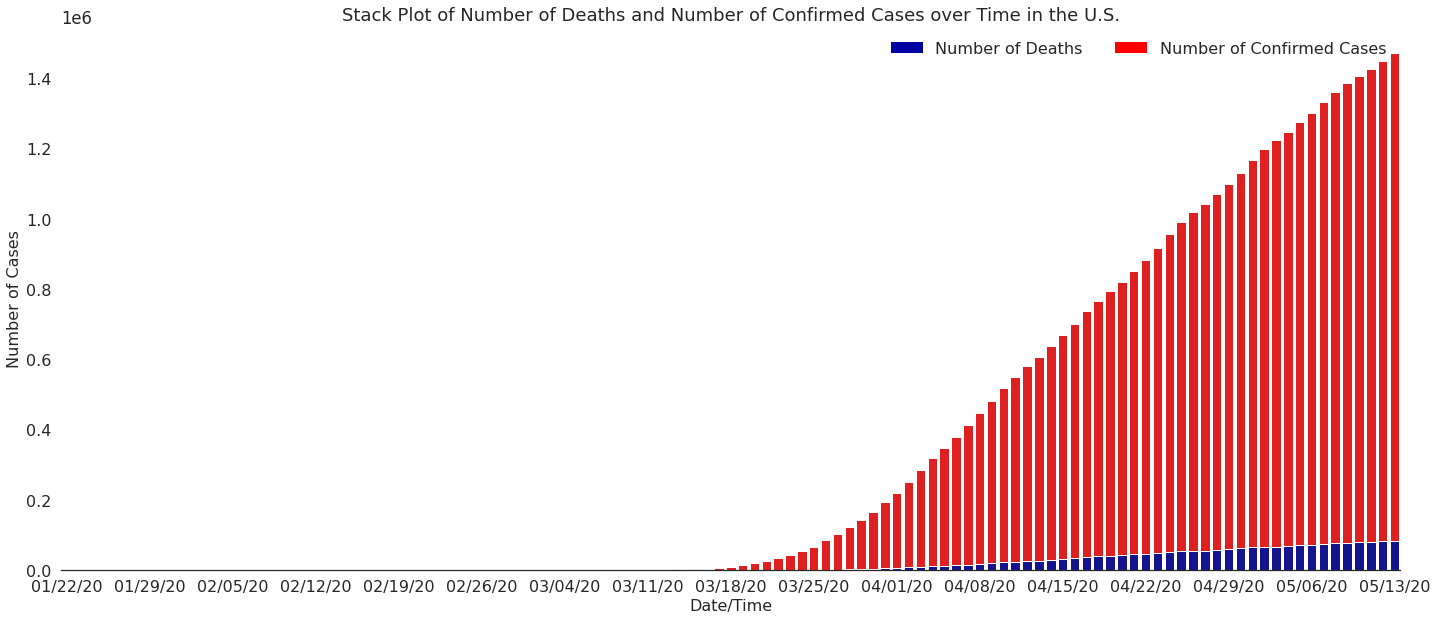

In [ ]:
# REPRESENTATION OF TOTAL DEATHS AND CONFIRMED CASES OVER TIME

total_confirm_time = time_series_confirmed.iloc[:, 10:].sum(axis = 0)
total_death_time = time_series_deaths.iloc[:, 11:].sum(axis = 0)
combined_time = total_confirm_time + total_death_time
list_of_times = time_series_deaths.iloc[:, 11:].columns

sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = list_of_times, y = combined_time, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = list_of_times, y = total_death_time, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Number of Deaths', 'Number of Confirmed Cases'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Number of Cases")
bottom_plot.set_xlabel("Date/Time")
bottom_plot.set_title("Stack Plot of Number of Deaths and Number of Confirmed Cases over Time in the U.S.")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

for ind, label in enumerate(bottom_plot.get_xticklabels()):
    if ind % 7 == 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

From the stack plot above, we can see that the number of confirmed cases exponentially rises over time where as the number of deaths is linear throughout time. At some point in the graph, we can see the exponential rise flattening around 2 weeks after they announced national efforts in enforcing stay-at-home policies (which was announced on March 20, 2020). 

The following four plots (which was created using sns.lineplot) show the growth of the total deaths and confirmed cases for the top 10 worst affected states in the US, respectively. The last two lineplots depicts the log of it.

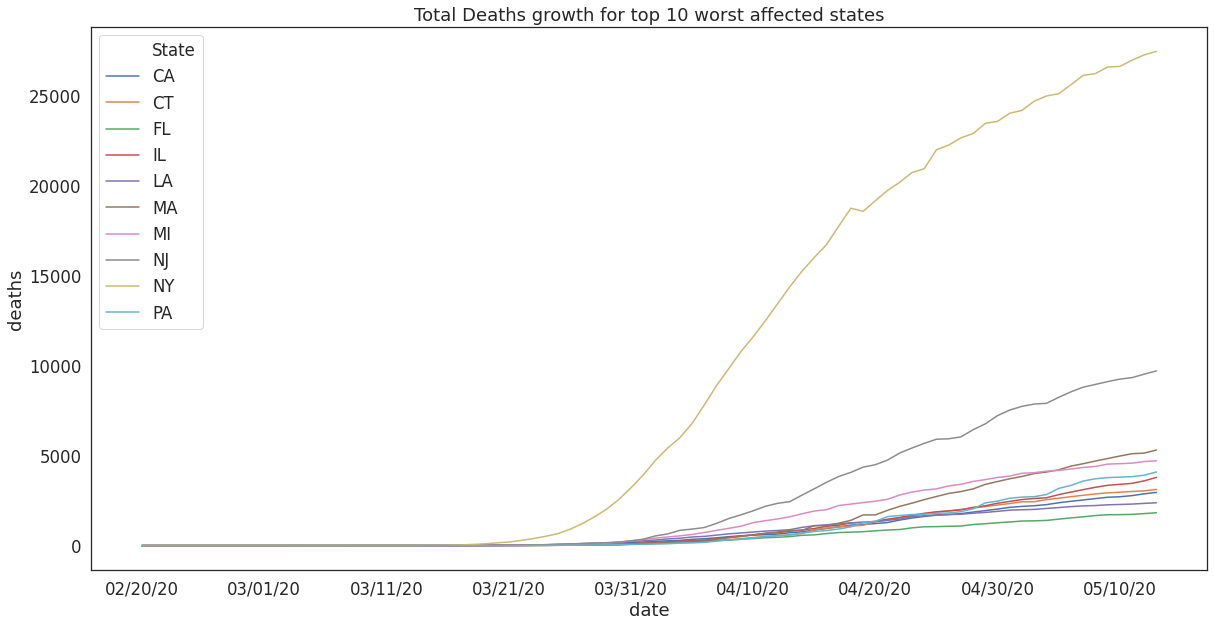

In [ ]:
# Plot of Total Deaths Groth for Top 10 Worst Affected States

temp_deaths = time_series_deaths.copy()

# get dates from the first confirmed case in US and onwards
date_of_1st = list(tsd_dates).index('02/20/20')
tsd_after_1st = tsd_dates[date_of_1st:]

# get top 10 affected states
states_deaths = temp_deaths.groupby(['Province_State']).sum().reset_index()
top_states = list(states_deaths.nlargest(10, tsd_dates[-1])['Province_State'])

df = df_deaths[df_deaths['State'].isin(map(us_state_abbrev.get, top_states))]
df_d = df[df["date"].isin(tsd_after_1st)]

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='deaths', hue='State', data=df_d)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title("Total Deaths growth for top 10 worst affected states");

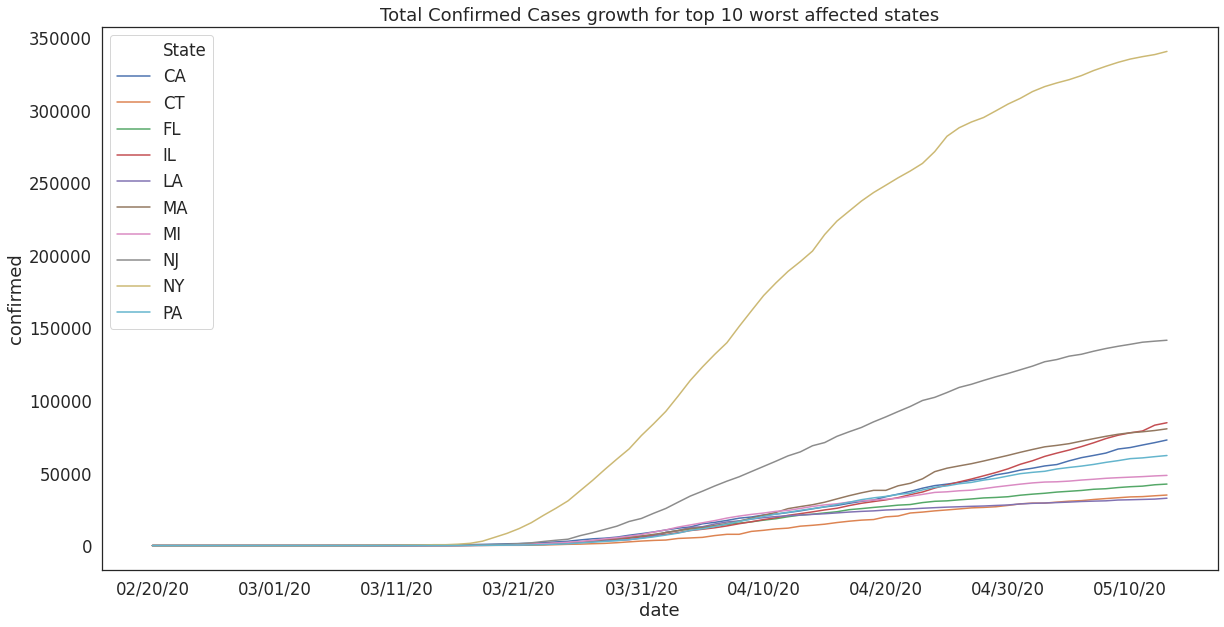

In [ ]:
# Plot of Total Confirmed Case Groth for Top 10 Worst Affected States
df = df_confirmed[df_confirmed['State'].isin(map(us_state_abbrev.get, top_states))]
df_c = df[df["date"].isin(tsd_after_1st)]

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='confirmed', hue='State', data=df_c)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title("Total Confirmed Cases growth for top 10 worst affected states");

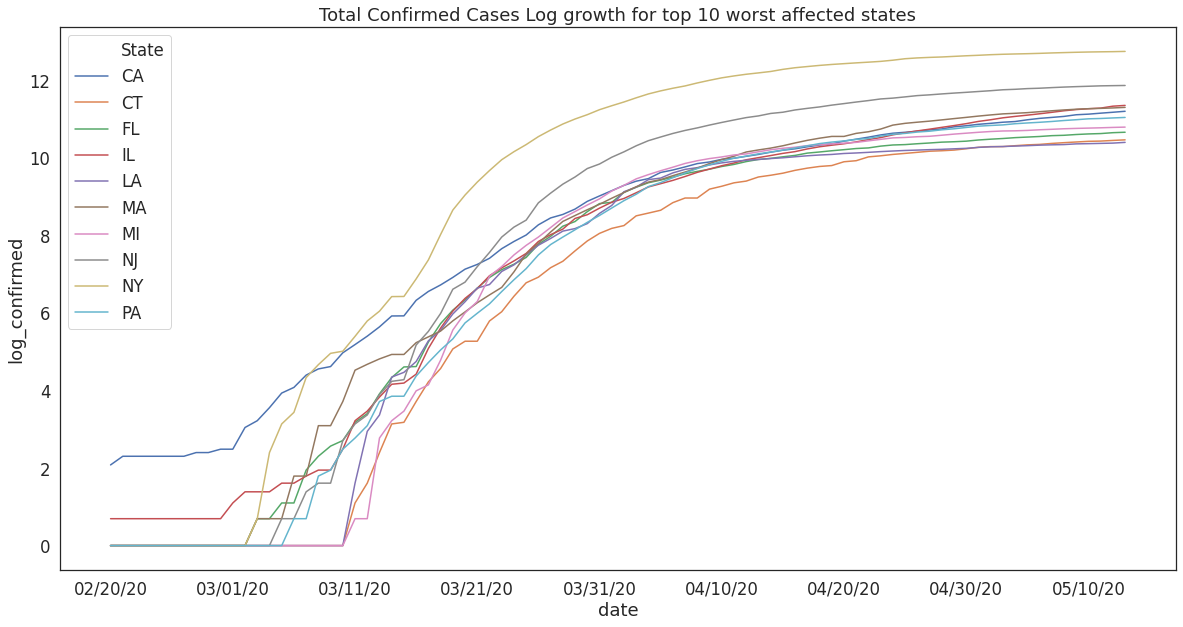

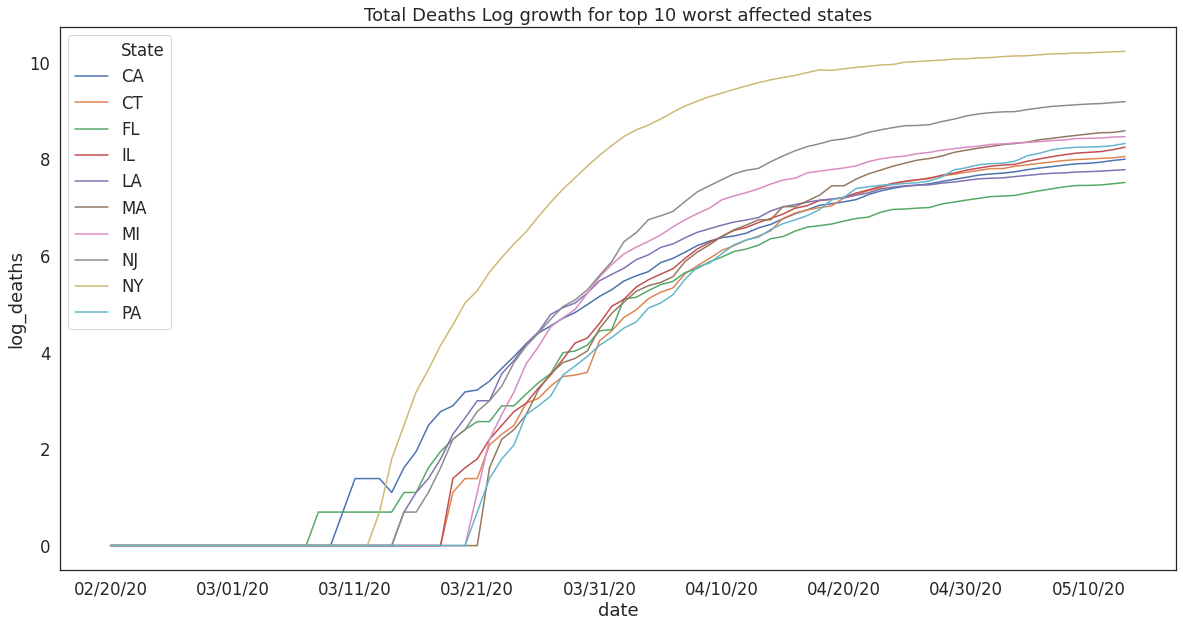

In [ ]:
#Plots of Log Growth of confirmed Cases and Deaths in Top 10 Worst Affected States
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='log_confirmed', hue='State', data=df_c)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title("Total Confirmed Cases Log growth for top 10 worst affected states")

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='log_deaths', hue='State', data=df_d)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_title("Total Deaths Log growth for top 10 worst affected states");

Based on the lineplots above, we can see that New York and New Jersey are experiencing the worst of the 10 worst affected states in the country. Based on the figures above, we can see that New York has at least twice more deaths and confirmed cases compared to other highly affected states. Additionally, we can see that the numbers significantly change around March 21, 2020, which is the time when calls for a national lockdown took place. This may be the case due to limited testing supplies and the slow progress of actions being taken to address the virus.

Also, the log plots show that all states are on the same general trajectory of exponential growth for both confirmed cases and deaths.

The following plots (which were created using sns.jointplot) aim to find features that may be useful for building our prediction model. In other words, these plots were made to find correlations between a feature and the number of cases/deaths. 

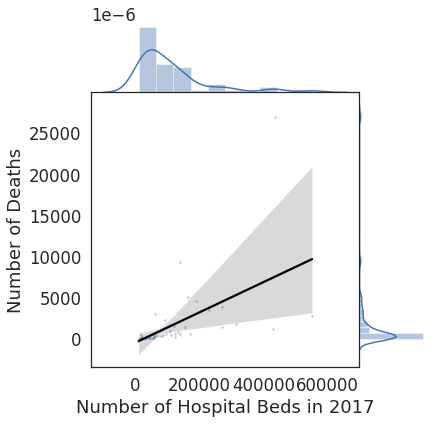

In [ ]:
# correlation between the number of medical beds and death
combined_hospital_state = states_summary_US.merge(abridged_counties, on='STATEFP', how='left')
combined_hospital_state = combined_hospital_state.groupby(['Province_State']).sum()

sns.jointplot(
    x=combined_hospital_state['#FTEHospitalTotal2017'], 
    y=states_summary_US['Deaths'], 
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
).set_axis_labels("Number of Hospital Beds in 2017", "Number of Deaths");

Based on the jointplot above, we can see that there is very some to little correlation between the number of hosptial beds in 2017 and the number of deaths. Although positively correlated, it seems to slightly contradict our reasonings for conidering this feature. We assumed that if there are more hosptial beds, there will be less deaths since there is enough hospital beds to accomadate the infected, but it seems that with more hospital deaths, there are in fact more deaths. Additionally, there seems to be a few outliers for this joint plot, notably the one associated around 400,000 hospital beds.

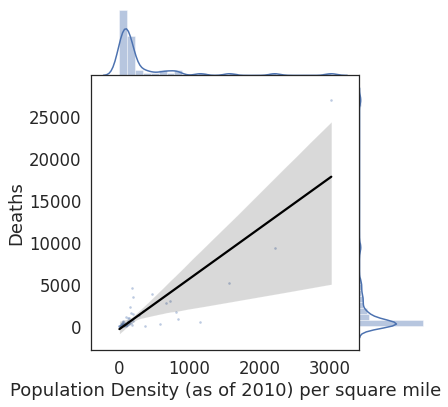

In [ ]:
# correlation between population density and death

combined_hospital_state = states_summary_US.merge(abridged_counties, on='STATEFP', how='left')
combined_hospital_state = combined_hospital_state.groupby(['Province_State']).mean()

sns.jointplot(
    x=combined_hospital_state['PopulationDensityperSqMile2010'], 
    y=states_summary_US['Deaths'], 
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
).set_axis_labels("Population Density (as of 2010) per square mile", "Deaths");



The jointplot above depicts a better feature that could be used in training our model. There is a greater correlation between the population density and the number of deaths, with one small outlier present in the plot. It seems that the greater the density, the more deaths there are. This could be due to the fact that there are more people in general. It could also be because of the fact that with a dense population, there will be more interactions between people.

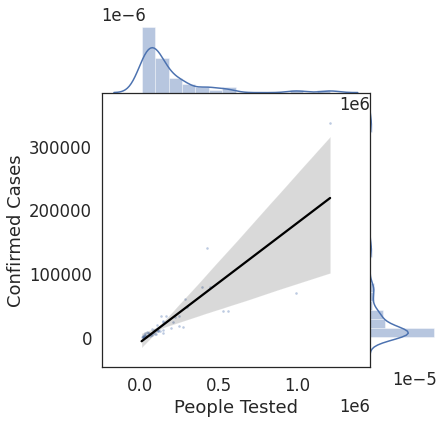

In [ ]:
# correlation between the number of people tested and confirmed cases

combined_hospital_state = states_summary_US.merge(abridged_counties, on='STATEFP', how='left')
combined_hospital_state = combined_hospital_state.groupby(['Province_State']).mean()

sns.jointplot(
    x=combined_hospital_state['People_Tested'], 
    y=states_summary_US['Confirmed'], 
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
).set_axis_labels("People Tested", "Confirmed Cases");

The jointplot above shows a correlation between the number of people tested in a particular state and the number of confirmed cases in that state. This indicates that the number of confirmed cases is dependent on how aggressive a particular state is testing against the virus as well as their testing levels and capacities. This indicates that we can use people tested as a feature in our model.

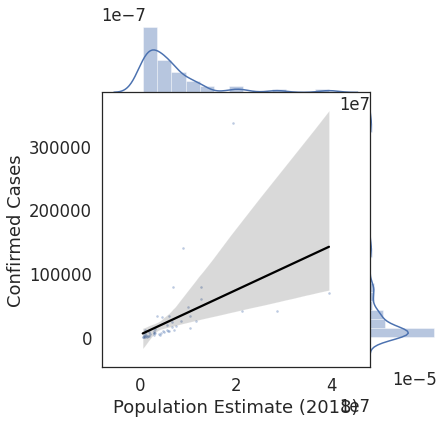

In [ ]:
combined_hospital_state = states_summary_US.merge(abridged_counties, on='STATEFP', how='left')
combined_hospital_state = combined_hospital_state.groupby(['Province_State']).sum()

sns.jointplot(
    x=combined_hospital_state['PopulationEstimate2018'], 
    y=states_summary_US['Confirmed'], 
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
).set_axis_labels("Population Estimate (2018)", "Confirmed Cases");

The jointplot above shows a correlation between the population as of 2018 in a particular state and the number of confirmed cases in that state. This shows that there is minimal depedency between the number of confirmed cases and the population of a state, indicating it may be less useful as a feature. 

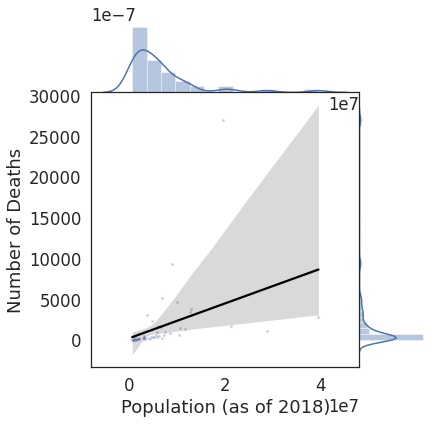

In [ ]:
combined_hospital_state = states_summary_US.merge(abridged_counties, on='STATEFP', how='left')
combined_hospital_state = combined_hospital_state.groupby(['Province_State']).sum()

sns.jointplot(
    x=combined_hospital_state['PopulationEstimate2018'], 
    y=states_summary_US['Deaths'], 
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
).set_axis_labels("Population (as of 2018)", "Number of Deaths");

The jointplot above shows a correlation between the population as of 2018 in a particular state and the number of deaths in that state. This shows that there is minimal depedency between the number of deaths and the population of a state, indicating it may be less useful as a feature. 

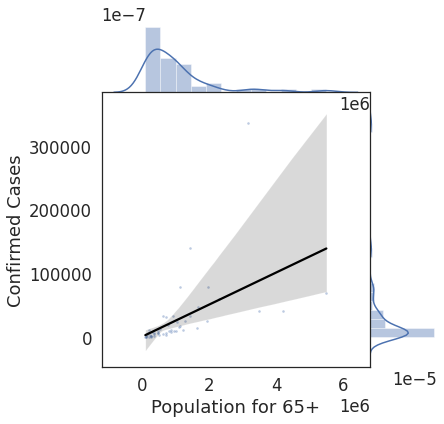

In [ ]:
combined_hospital_state = states_summary_US.merge(abridged_counties, on='STATEFP', how='left')
combined_hospital_state = combined_hospital_state.groupby(['Province_State']).sum()

sns.jointplot(
    x=combined_hospital_state['PopulationEstimate65+2017'], 
    y=states_summary_US['Confirmed'], 
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
).set_axis_labels("Population for 65+", "Confirmed Cases");

The jointplot above shows a correlation between the population for 65+ (as of 2017) in a particular state and the number of confirmed cases in that state. This shows that there is minimal depedency between the number of confirmed cases and the 65+ population, indicating it may be less useful as a feature. 

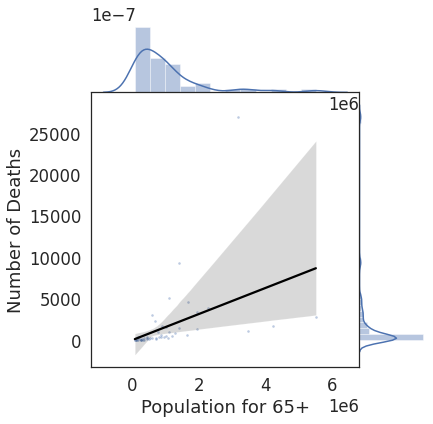

In [ ]:
combined_hospital_state = states_summary_US.merge(abridged_counties, on='STATEFP', how='left')
combined_hospital_state = combined_hospital_state.groupby(['Province_State']).sum()

sns.jointplot(
    x=combined_hospital_state['PopulationEstimate65+2017'], 
    y=states_summary_US['Deaths'], 
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
).set_axis_labels("Population for 65+", "Number of Deaths");

The jointplot above shows a correlation between the population for 65+ (as of 2017) in a particular state and the number of deaths in that state. This shows that there is minimal depedency between the number of deaths and the 65+ population, indicating it may be less useful as a feature.

## Part 3: Feature Engineering

In [ ]:
# Split dataset into training and test sets

# confirmed dataset
data_confirmed = time_series_confirmed.groupby(['Province_State']).sum().reset_index()
# nat: changed states_summary to states_summary_US
tested = states_summary_US[['Province_State', 'People_Tested']]
data_confirmed = tested.merge(data_confirmed, on='Province_State', how='left')
data_confirmed.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_'], axis=1, inplace=True)

train_c, val_c = train_test_split(data_confirmed, test_size=0.2, random_state=42)
train_c_X, train_c_Y = train_c.iloc[:, :-1], train_c.iloc[:, -1]
val_c_X, val_c_Y = val_c.iloc[:, :-1], val_c.iloc[:, -1]

print("Training", train_c.shape)
print("Validation", val_c.shape)
train_c.head()

Training (40, 115)
Validation (10, 115)


,Province_State,People_Tested,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,...,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20
12,Illinois,442425.0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,10357,11259,12262,13553,15078,16422,17887,19180,20852,22025,23248,24593,25734,27578,29160,30357,31513,33059,35107,36937,39658,41777,43903,45883,48102,50358,52918,56055,58505,61499,63777,65889,68232,70871,73760,76085,77741,79007,83021,84694
4,California,991897.0,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,...,12837,15034,16019,17351,18897,19710,21081,21706,22795,23931,25356,26686,27677,29157,30491,31431,33686,35465,37344,39561,41355,42368,43558,44966,46164,48747,50130,52026,53347,54903,55884,58456,60616,62148,63779,66558,67600,69329,70978,72798
37,Pennsylvania,288858.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10444,11589,13127,14853,16631,18300,20051,21719,22938,24292,25465,26753,28258,29888,31652,32902,33914,35249,36082,38379,40208,41153,42616,43558,45137,46327,47971,49579,50494,51225,52816,53864,54800,55956,57371,58560,59939,60459,61310,62101
8,Florida,561057.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11537,12350,13324,14545,15456,16364,17531,18494,19895,21019,21628,22511,23343,24759,25492,26314,27059,27869,28309,29648,30533,30839,31532,32138,32848,33193,33690,34728,35463,36078,36897,37439,38002,38828,39199,40001,40596,40982,41923,42402
3,Arkansas,69030.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,743,837,875,946,1000,1119,1171,1228,1280,1410,1498,1569,1620,1695,1744,1781,1973,1990,2276,2599,2810,2911,3001,3069,3127,3193,3281,3337,3372,3437,3491,3525,3611,3703,3747,3747,4012,4043,4164,4236


In [ ]:
# Split dataset into training and test sets

# deaths dataset
data_deaths = time_series_deaths.groupby(['Province_State']).sum().reset_index()
# nat: changed states_summary to states_summary_US
# tested = states_summary_US[['Province_State', 'People_Tested']]
# data_deaths = tested.merge(data_deaths, on='Province_State', how='left')
deaths = combined_hospital_state.reset_index()
deaths = deaths[['Province_State','PopulationEstimate2018', 'PopulationEstimate65+2017']]
data_deaths = deaths.merge(data_deaths, on='Province_State', how='left')
data_deaths.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Population'], axis=1, inplace=True)

train_d, val_d = train_test_split(data_deaths, test_size=0.2, random_state=42)
train_d_X, train_d_Y = train_d.iloc[:, :-1], train_d.iloc[:, -1]
val_d_X, val_d_Y = val_d.iloc[:, :-1], val_d.iloc[:, -1]

# drop the province state since we don't want strings while modeling
train_c_X.drop('Province_State', axis=1, inplace=True)
train_d_X.drop('Province_State', axis=1, inplace=True)

val_c_X.drop('Province_State', axis=1, inplace=True)
val_d_X.drop('Province_State', axis=1, inplace=True)

print("Training", train_d.shape)
print("Validation", val_d.shape)
train_d.head()

Training (40, 116)
Validation (10, 116)


,Province_State,PopulationEstimate2018,PopulationEstimate65+2017,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,...,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20
12,Illinois,12741080.0,1945398.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,244,274,307,380,462,528,597,677,720,798,868,949,1072,1132,1259,1290,1349,1468,1565,1688,1795,1875,1933,1983,2125,2215,2355,2457,2559,2618,2659,2834,2974,3111,3241,3349,3406,3459,3601,3792
4,California,39557045.0,5505358.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,289,348,380,432,495,544,583,604,640,714,767,860,956,1037,1140,1177,1225,1282,1421,1533,1621,1689,1725,1779,1864,1946,2031,2126,2180,2216,2278,2381,2464,2535,2613,2687,2716,2779,2879,2957
37,Pennsylvania,12807060.0,2279687.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,136,151,179,247,318,345,418,503,557,589,691,779,841,921,1042,1276,1348,1614,1673,1724,1747,1793,1816,1886,2046,2373,2475,2635,2695,2720,2838,3179,3345,3589,3715,3779,3806,3832,3914,4094
8,Florida,21299325.0,4214635.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,195,221,236,283,309,354,390,438,461,499,571,596,668,725,748,774,822,867,893,987,1046,1055,1075,1088,1171,1218,1268,1314,1364,1379,1399,1471,1539,1600,1669,1715,1721,1735,1779,1827
3,Arkansas,3013825.0,499144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,16,16,18,18,21,21,25,27,29,32,33,37,37,38,39,41,42,42,45,47,48,51,51,57,57,61,64,72,76,80,83,87,87,88,88,91,94,95,97


In [ ]:
# LOGISTIC REGRESSION FOR CONFIRMED CASES
from sklearn.model_selection import cross_val_score

model =  LogisticRegression()
model.fit(train_c_X, train_c_Y)

training_accuracy = model.score(train_c_X, train_c_Y)
print("Training Accuracy: ", training_accuracy)
print("Validation Accuracy: ", model.score(val_c_X, val_c_Y))

Training Accuracy:  0.575
Validation Accuracy:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# LOGISTIC REGRESSION FOR DEATHS

model =  LogisticRegression()
model.fit(train_d_X, train_d_Y)

training_accuracy = model.score(train_d_X, train_d_Y)

print("Training Accuracy: ", training_accuracy)
print("Validation Accuracy: ", model.score(val_d_X, val_d_Y))

Training Accuracy:  0.175
Validation Accuracy:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# LINEAR REGRESSION FOR CONFIRMED CASES

model =  LinearRegression()
model.fit(train_c_X, train_c_Y)

training_accuracy = model.score(train_c_X, train_c_Y)
scores = cross_val_score(model, train_c_X, train_c_Y, cv=5)

print("Training Accuracy: ", training_accuracy)
print("Validation Accuracy: ", model.score(val_c_X, val_c_Y))
print("CV Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Training Accuracy:  1.0
Validation Accuracy:  0.9994276936869764
CV Accuracy: 0.99991 (+/- 0.00014)


In [ ]:
# LINEAR REGRESSION FOR DEATHS

model =  LinearRegression()
model.fit(train_d_X, train_d_Y)

training_accuracy = model.score(train_d_X, train_d_Y)
scores = cross_val_score(model, train_d_X, train_d_Y, cv=5)

print("Training Accuracy: ", training_accuracy)
print("Validation Accuracy: ", model.score(val_d_X, val_d_Y))
print("CV Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Training Accuracy:  1.0
Validation Accuracy:  0.9979678832070568
CV Accuracy: 0.99981 (+/- 0.00045)


In [ ]:
# LASSO REGRESSION FOR CONFIRMED CASES

model =  Lasso(max_iter = 10000)
model.fit(train_c_X, train_c_Y)

training_accuracy = model.score(train_c_X, train_c_Y)
print("Training Accuracy: ", training_accuracy)

print("Validation Accuracy", model.score(val_c_X, val_c_Y))

scores = cross_val_score(model, train_c_X, train_c_Y, cv=5)
print("CV Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Training Accuracy:  0.9999628240079542
Validation Accuracy 0.9837698642359489
CV Accuracy: 0.42232 (+/- 2.26419)


In [ ]:
# LASSO REGRESSION FOR DEATHS

model =  Lasso(max_iter = 10000)
model.fit(train_d_X, train_d_Y)

training_accuracy = model.score(train_d_X, train_d_Y)
print("Training Accuracy: ", training_accuracy)

print("Validation Accuracy", model.score(val_d_X, val_d_Y))

scores = cross_val_score(model, train_d_X, train_d_Y, cv=5)
print("CV Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Training Accuracy:  0.9999736037140547
Validation Accuracy 0.9990350925836742
CV Accuracy: 0.99546 (+/- 0.01178)


We decided to cluster the counties in `abridged_counties` so that we could model similar counties with the same model, rather than the entire dataset with the same model. This is due to the fact that differing age makeups, levels of hospital quality, and preexisting condition demographics have been shown in the past to affect disease propogation rates.

We first dropped the columns that were not useful in quantitatively describing a county in a clustering sense, i.e. identifiers and times. While it would have been useful to consider the dates of quarantine orders, it proved to difficult to implement. We then featurized each column to be standard normal using StandardScaler so that columns with mostly large values do not dominate.

We separated the counties using K-means, trying with a different number of clusters. None of these proved useful for the original intent because all of these always had a few clusters that were too small (<10 counties) to draw inferences from.

In [ ]:
# Drop non-useful fields and dates

df = abridged_counties.copy()
df = df.drop(labels=['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State', 'lat', 'lon',
               'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName', 'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
                    'stay at home', '>50 gatherings', '>500 gatherings', 'public schools', 'restaurant dine-in',
                    'entertainment/gym', 'federal guidelines', 'foreign travel ban'], axis=1)
df = df.fillna(0)
df = StandardScaler().fit_transform(df)
df


# Cluster with K-Means and 10 clusters

print("Counts of counties in each cluster. The length of the list is the number of clusters")
kmeans = KMeans(n_clusters=3).fit(df)
p = kmeans.predict(df)
print([(p==i).sum() for i in range(3)])

kmeans = KMeans(n_clusters=4).fit(df)
p = kmeans.predict(df)
print([(p==i).sum() for i in range(4)])

kmeans = KMeans(n_clusters=5).fit(df)
p = kmeans.predict(df)
print([(p==i).sum() for i in range(5)])

kmeans = KMeans(n_clusters=10).fit(df)
p = kmeans.predict(df)
print([(p==i).sum() for i in range(10)])
kmeans = KMeans(n_clusters=10).fit(df)
p = kmeans.predict(df)
print([(p==i).sum() for i in range(10)])
kmeans = KMeans(n_clusters=10).fit(df)
p = kmeans.predict(df)
print([(p==i).sum() for i in range(10)])
#Notice the different local minimas that arise from 10 clusters

Counts of counties in each cluster. The length of the list is the number of clusters
[106, 3114, 4]
[3021, 30, 171, 2]
[3017, 30, 5, 171, 1]
[358, 8, 1229, 3, 1, 21, 60, 1390, 108, 46]
[1382, 18, 60, 1, 116, 357, 1240, 46, 3, 1]
[1177, 1365, 18, 3, 73, 14, 138, 46, 389, 1]
